### Iris-EDA : Import/Clean Iris Dataset & Perform Exploratory Data Analysis
### Author: Payal Patel

#### Import Libraries & Dataset

In [1]:
## Import Libraries ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
import os
import sys

In [2]:
## Change Working Directory ##
os.chdir('C:/Users/19197/Desktop/github/iris')

In [3]:
## Import Dataset ##
iris = pd.read_csv('iris.csv')

#### Data Cleaning 

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
iris.shape

(150, 5)

In [6]:
# rename columns
newcols={"Sepal.Length":"Sepal Length", "Sepal.Width":"Sepal Width",
        "Petal.Length": "Petal Length", "Petal.Width":"Petal Width"} 
  
iris.rename(columns=newcols,inplace=True) 
  
print(iris.head()) 

   Sepal Length  Sepal Width  Petal Length  Petal Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [7]:
# store column names in list
cols = iris.columns.values

In [8]:
cols

array(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width',
       'Species'], dtype=object)

In [9]:
# create list of features
features = cols[:-1]

In [10]:
# check missing values
iris.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

#### Exploratory Data Analysis

To Do: kdes, add analysis/notes for each graph

In [11]:
iris.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


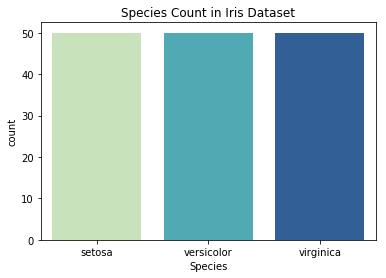

In [12]:
# Create countplot of species in Iris dataset
ax = sns.countplot(x="Species", data=iris, palette="YlGnBu")
ax.set_title("Species Count in Iris Dataset")
plt.show()

In [13]:
iris.groupby('Species').mean()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [14]:
iris.groupby('Species').median()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


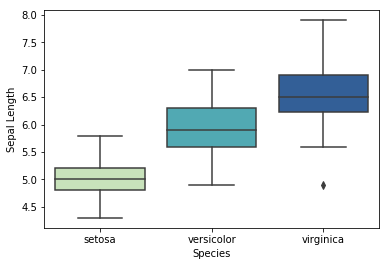

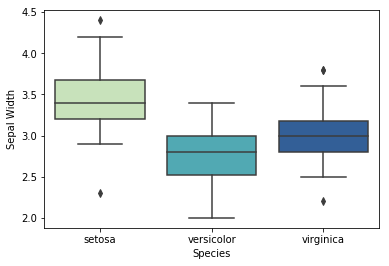

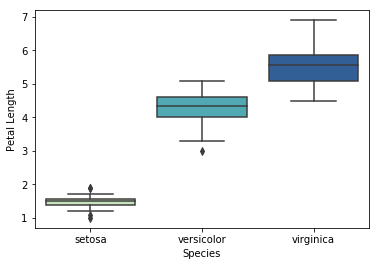

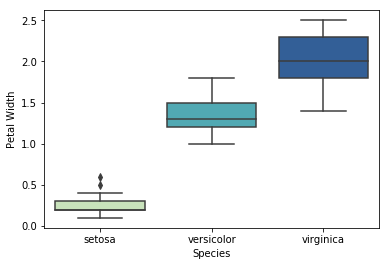

In [15]:
# Boxplot for each numerical feature (group by species)
for i in features: 
    sns.boxplot(x="Species", y=i, palette="YlGnBu", data=iris)
    plt.show()

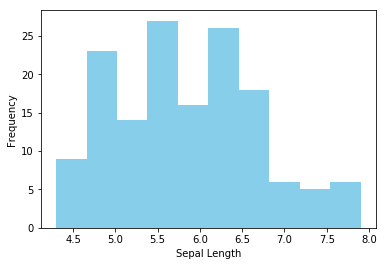

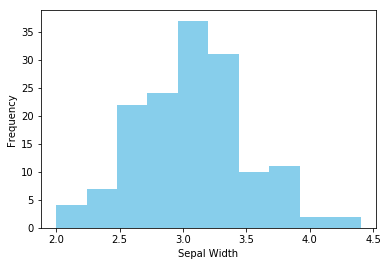

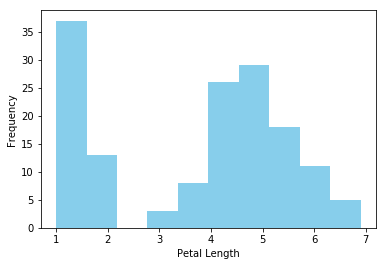

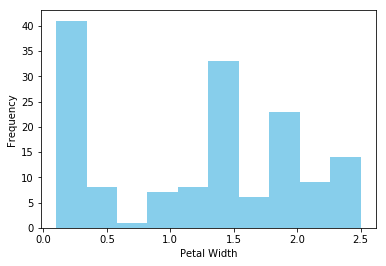

In [16]:
# Histograms- overall (also do by group? stacked by group?)
for i in features:
    plt.hist(iris[i], color = 'skyblue')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

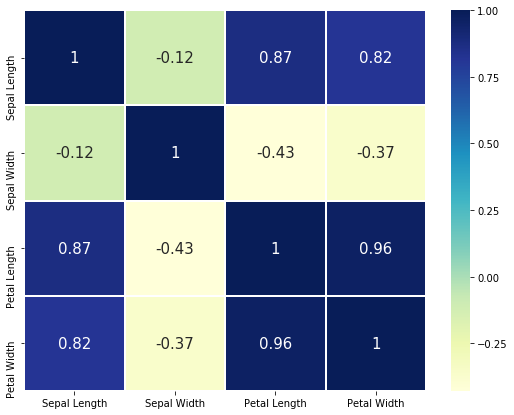

In [17]:
# Heatmap - looking at correlation between the numerical variables in the Iris dataset
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(iris.corr(), cmap="YlGnBu", linecolor = 'white', linewidths = 1, annot = True, 
            annot_kws={"fontsize":15}, ax = ax) 
plt.show()

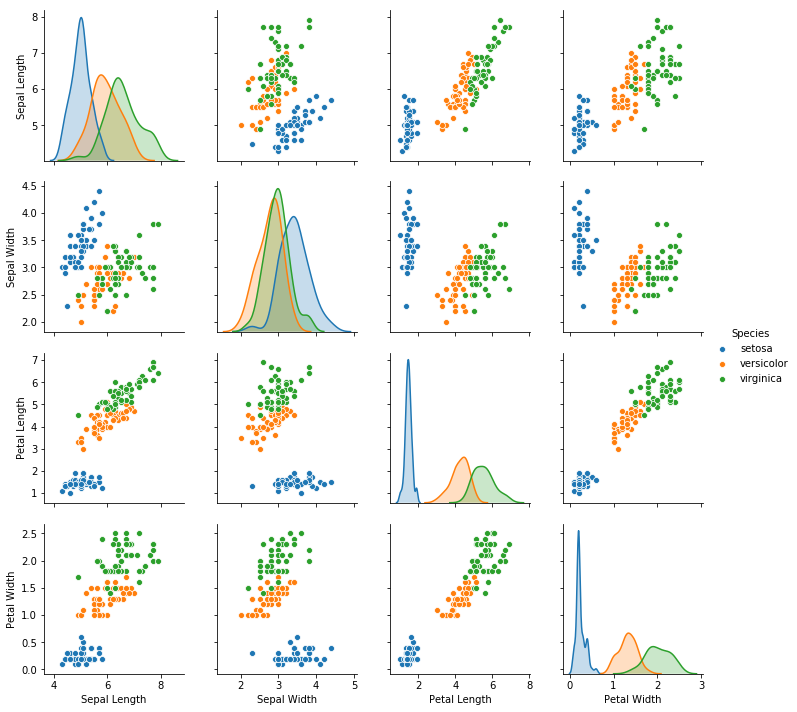

In [18]:
# Multivariate Analysis - Pair plot (visualize the relationship between each type of column variable)
sns.pairplot(iris,hue="Species") 
plt.show()